In [46]:
# Uncomment below if you want to run this file only
#%run main.ipynb
#%run data_cleaning.ipynb
#%run data_visualization.ipynb
#%run feature_engineering.ipynb

In [47]:
# Read the CSV From FEATURE ENGINEERING data source file from S3 into a DataFrame
# Use the methods from the S3Utils class
if s3_utils.check_file_exists(output_file_key_data_feature_engineering):
    dataset = s3_utils.read_csv_from_s3(output_file_key_data_feature_engineering)

In [48]:

# Select the features to include just to check the model performance
# selected_features = ['id','new_age_category_numeric', 'pack_encoded', 'number_products', 'new_setup_tenor', 'rest_avg_paym', 'rest_dynamic_cur_3m','rest_dynamic_fdep_3m']
# ['id', 'amount_rub_clo_prc', 'amount_rub_sup_prc', 'rest_dynamic_save_3m', 'rest_avg_cur', 'amount_rub_nas_prc', 'amount_rub_atm_prc', 'rest_dynamic_fdep_3m', 'rest_avg_paym', 'ldeal_grace_days_pct_med', 'rest_dynamic_cur_3m', 'rest_dynamic_paym_3m', 'rest_dynamic_il_3m', 'rest_dynamic_cc_3m', 'target', 'pack_encoded', 'number_products', 'new_age_category_numeric', 'new_setup_tenor', 'total_turnover_category', 'total_turnover_1m_category', 'total_turnover_3m_category']

# Split the dataset into features (X) and target variable (y) using the selected features
#X = dataset[selected_features]
X = dataset.drop(columns=['target'])
y = dataset['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Instantiate the RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("ROC AUC:", roc_auc)


d:\Users\presc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9186257120602119
Precision: 0.0
Recall: 0.0
ROC AUC: 0.5


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy: 0.9186257120602119


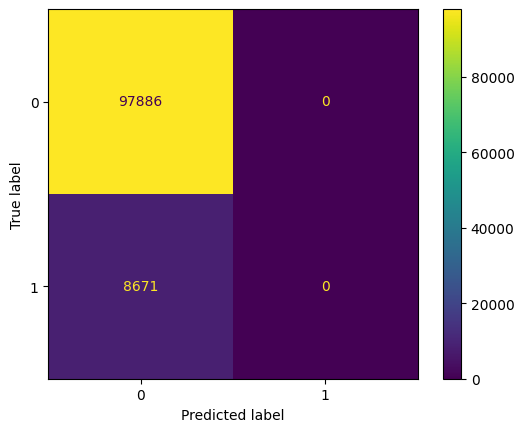

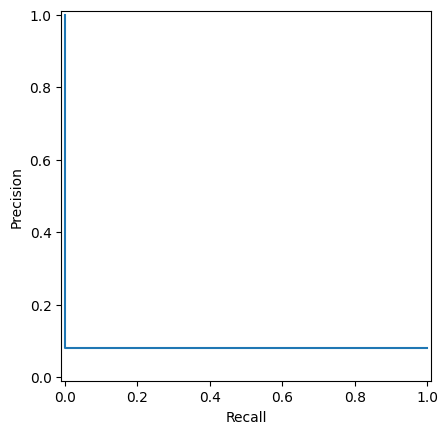

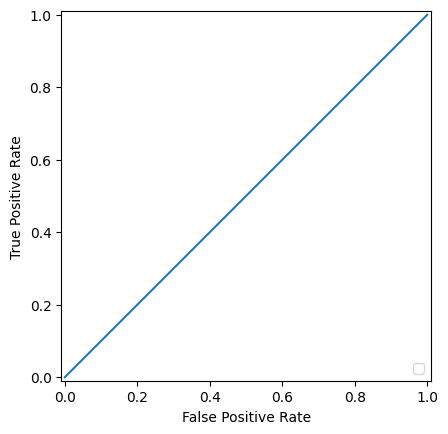

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm).plot()

# Plot the precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_display = PrecisionRecallDisplay(precision=precision, recall=recall).plot()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


In [51]:

# Create a new DataFrame with the client or ID and churn prediction
churn_df = pd.DataFrame({'id': X_test['id'], 'target': y_pred_series})

#update this path if you want to use your local
output_file_key_data_X_train = f'{env}/final/model_one/X_train.csv'
output_file_key_data_X_test = f'{env}/final/model_one/X_test.csv'

output_file_key_data_Y_train = f'{env}/final/model_one/Y_train.csv'
output_file_key_data_Y_test = f'{env}/final/model_one/Y_test.csv'

output_file_key_data_churn_prediction = f'{env}/final/model_one/churn_prediction.csv'

# Save the X_train and X_test data to CSV files for checking purposes
s3_utils.write_csv_to_s3(output_file_key_data_X_train, X_train)
s3_utils.write_csv_to_s3(output_file_key_data_X_test, X_test)


# Save the y_train and y_test data to CSV files
s3_utils.write_csv_to_s3(output_file_key_data_Y_train, y_train)
s3_utils.write_csv_to_s3(output_file_key_data_Y_test, y_test)

# Save the churn prediction to a CSV file
s3_utils.write_csv_to_s3(output_file_key_data_churn_prediction, churn_df)


Accuracy: 0.9186257120602119
